In [1]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_fd7a3fcd2dda49b8a8f8507ca635f81e = 'https://s3.eu-geo.objectstorage.softlayer.net'
else:
    endpoint_fd7a3fcd2dda49b8a8f8507ca635f81e = 'https://s3.eu-geo.objectstorage.service.networklayer.com'

client_fd7a3fcd2dda49b8a8f8507ca635f81e = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mC4kc4LdEW6OWYmTQeOm1c9f0kojBxlGkwftfpWJ_pUT',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_fd7a3fcd2dda49b8a8f8507ca635f81e)

body = client_fd7a3fcd2dda49b8a8f8507ca635f81e.get_object(Bucket='minorproject-donotdelete-pr-fyphfcxvpxslbo',Key='pd_speech_features.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [2]:
df.shape

(756, 755)

In [3]:
df.shape
df['class'].value_counts()

1    564
0    192
Name: class, dtype: int64

In [4]:
dup=len(df['id'])-len(df['id'].drop_duplicates())
print("No of duplicate ids = "+str(dup))

No of duplicate ids = 504


In [5]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [6]:
df.isnull().sum().sort_values(ascending=False)


class                            0
det_LT_entropy_shannon_6_coef    0
det_LT_entropy_log_5_coef        0
det_LT_entropy_log_4_coef        0
det_LT_entropy_log_3_coef        0
                                ..
tqwt_TKEO_std_dec_36             0
tqwt_TKEO_std_dec_35             0
tqwt_TKEO_std_dec_34             0
tqwt_TKEO_std_dec_33             0
id                               0
Length: 755, dtype: int64

In [7]:
df.corr()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
id,1.000000,-0.133605,0.026667,0.041938,-0.084606,0.085828,0.085226,-0.100831,-0.060464,-0.052865,...,0.036897,0.016047,-0.023317,-0.045943,-0.041835,-0.053781,-0.058034,-0.057807,-0.055775,-0.111661
gender,-0.133605,1.000000,0.010175,0.099356,0.168321,-0.478367,-0.477710,0.460422,-0.110587,0.112004,...,-0.098689,0.000210,0.066091,0.083499,0.089793,0.107618,0.128936,0.107734,0.104828,0.182713
PPE,0.026667,0.010175,1.000000,-0.094775,-0.405558,0.191535,0.194098,-0.201907,-0.423660,-0.349053,...,0.144261,0.135544,0.091726,0.065035,0.044163,0.045755,0.046175,0.037385,0.039588,-0.072939
DFA,0.041938,0.099356,-0.094775,1.000000,0.155075,-0.286791,-0.286611,0.253708,0.084655,0.212120,...,-0.146325,-0.104456,-0.061129,-0.063451,-0.061845,-0.033914,0.043454,0.067843,0.116699,0.306070
RPDE,-0.084606,0.168321,-0.405558,0.155075,1.000000,-0.521193,-0.524839,0.506707,0.333545,0.614340,...,-0.315592,-0.278504,-0.148989,-0.101467,-0.098923,-0.097161,-0.036406,-0.018052,0.021945,0.247444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tqwt_kurtosisValue_dec_33,-0.053781,0.107618,0.045755,-0.033914,-0.097161,-0.047946,-0.047837,0.039487,-0.092429,0.018504,...,0.239203,0.486570,0.708646,0.841365,0.945107,1.000000,0.824620,0.698738,0.543845,0.119808
tqwt_kurtosisValue_dec_34,-0.058034,0.128936,0.046175,0.043454,-0.036406,-0.068664,-0.068561,0.046140,-0.061721,0.027886,...,0.139668,0.383328,0.587449,0.667325,0.729501,0.824620,1.000000,0.948008,0.785141,0.192345
tqwt_kurtosisValue_dec_35,-0.057807,0.107734,0.037385,0.067843,-0.018052,-0.069645,-0.069468,0.040828,-0.067636,0.010553,...,0.054510,0.275390,0.477147,0.550686,0.609663,0.698738,0.948008,1.000000,0.866696,0.219454
tqwt_kurtosisValue_dec_36,-0.055775,0.104828,0.039588,0.116699,0.021945,-0.062925,-0.062790,0.031685,-0.067147,0.003805,...,-0.108280,0.070046,0.290106,0.386061,0.467944,0.543845,0.785141,0.866696,1.000000,0.279827


In [8]:
dt=df.loc[:,'gender':'numPulses']
dt['class']=df['class']
dt.head()

,gender,PPE,DFA,RPDE,numPulses,class
0,1,0.85247,0.71826,0.57227,240,1
1,1,0.76686,0.69481,0.53966,234,1
2,1,0.85083,0.67604,0.58982,232,1
3,0,0.41121,0.79672,0.59257,178,1
4,0,0.32790,0.79782,0.53028,236,1


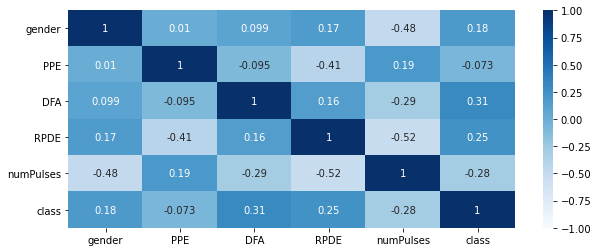

In [9]:
plt.figure(figsize=(10, 4))
heatmap = sns.heatmap(dt.corr(),xticklabels=True, yticklabels=True, vmin=-1, vmax=1, annot=True, cmap="Blues")

In [10]:
x_data=df.iloc[:,0:-1].values
xdf=df.iloc[:,0:-2]
y_data=df.iloc[:,-1].values

In [11]:
x_data.shape

(756, 754)

In [12]:
y_data.shape

(756,)

# SVM #

In [45]:
from sklearn.model_selection import train_test_split
  
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [51]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components =110, svd_solver='full')

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
  
explained_variance = pca.explained_variance_ratio_

In [52]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='poly', random_state=0, C= 1 , gamma = 'auto')  
classifier.fit(x_train, y_train) 

SVC(C=1, gamma='auto', kernel='poly', random_state=0)

In [53]:
y_pred=classifier.predict(x_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.873015873015873

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[ 30,  15],
       [  9, 135]])

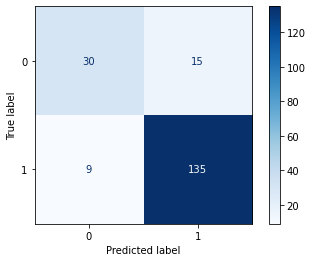

In [56]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, x_test, y_test, cmap="Blues")  
plt.show()

# Logistic Regression

In [92]:
from sklearn.linear_model import LogisticRegression
clfLR = LogisticRegression(solver='newton-cg', random_state=0, C=0.1)
clfLR

LogisticRegression(C=0.1, random_state=0, solver='newton-cg')

In [93]:
x_data=df.iloc[:,0:-1].values
xdf=df.iloc[:,0:-2]
y_data=df.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 0)


In [94]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [95]:
pcaLR = PCA(n_components =110, svd_solver='full')

x_train = pcaLR.fit_transform(x_train)
x_test = pcaLR.transform(x_test)
  
explained_variance = pca.explained_variance_ratio_

In [96]:
clfLR.fit(x_train,y_train)
y_pred=clfLR.predict(x_test)
accuracy_score(y_test, y_pred)

0.8571428571428571

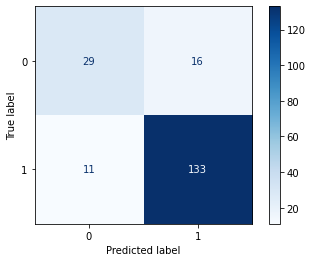

In [97]:
plot_confusion_matrix(clfLR,x_test, y_test, cmap="Blues")  
plt.show()

# KNN #

In [182]:
x_data=df.iloc[:,0:-1].values
xdf=df.iloc[:,0:-2]
y_data=df.iloc[:,-1].values

In [183]:
from sklearn.neighbors import KNeighborsClassifier

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.25, random_state = 0)

In [184]:
# s = StandardScaler()  
# s.fit(x_train)
 
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)
x_train

array([[ 0.88392591, -1.03774904,  0.19637997, ...,  1.16256451,
         1.12579781,  0.54790931],
       [-1.56415279,  0.96362411,  0.57777045, ..., -0.3859438 ,
        -0.5949402 , -0.80189982],
       [ 0.6377504 , -1.03774904,  0.27425888, ..., -0.54860305,
        -0.70250992, -0.80597038],
       ...,
       [ 1.14377784,  0.96362411,  0.55790637, ..., -0.54102102,
        -0.62883843, -0.76290892],
       [ 0.82922024,  0.96362411,  0.50415648, ...,  1.3268543 ,
         2.18354727,  2.48287488],
       [ 1.40362977,  0.96362411,  0.5262991 , ...,  0.6915444 ,
         0.78265638,  1.90142632]])

In [185]:
#pcaKNN = PCA(n_components =110, svd_solver='full')

#x_train = pcaKNN.fit_transform(x_train)
#x_test = pcaKNN.transform(x_test)
  

In [186]:
K = []
training = []
test = []
scores = {}
  
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
  
    training_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    K.append(k)
  
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

In [187]:
for keys, values in scores.items():
    print(keys, ':', values)

2 : [0.9805996472663139, 0.8783068783068783]
3 : [0.9611992945326279, 0.873015873015873]
4 : [0.9559082892416225, 0.8783068783068783]
5 : [0.9206349206349206, 0.8518518518518519]
6 : [0.9259259259259259, 0.8412698412698413]
7 : [0.890652557319224, 0.8412698412698413]
8 : [0.8994708994708994, 0.8253968253968254]
9 : [0.8747795414462081, 0.8042328042328042]
10 : [0.8853615520282186, 0.798941798941799]
11 : [0.8447971781305115, 0.7936507936507936]
12 : [0.8624338624338624, 0.798941798941799]
13 : [0.8395061728395061, 0.798941798941799]
14 : [0.8430335097001763, 0.8148148148148148]
15 : [0.8324514991181657, 0.8095238095238095]
16 : [0.8447971781305115, 0.8148148148148148]
17 : [0.8271604938271605, 0.8201058201058201]
18 : [0.8342151675485009, 0.8359788359788359]
19 : [0.8289241622574955, 0.8148148148148148]
20 : [0.8253968253968254, 0.8148148148148148]


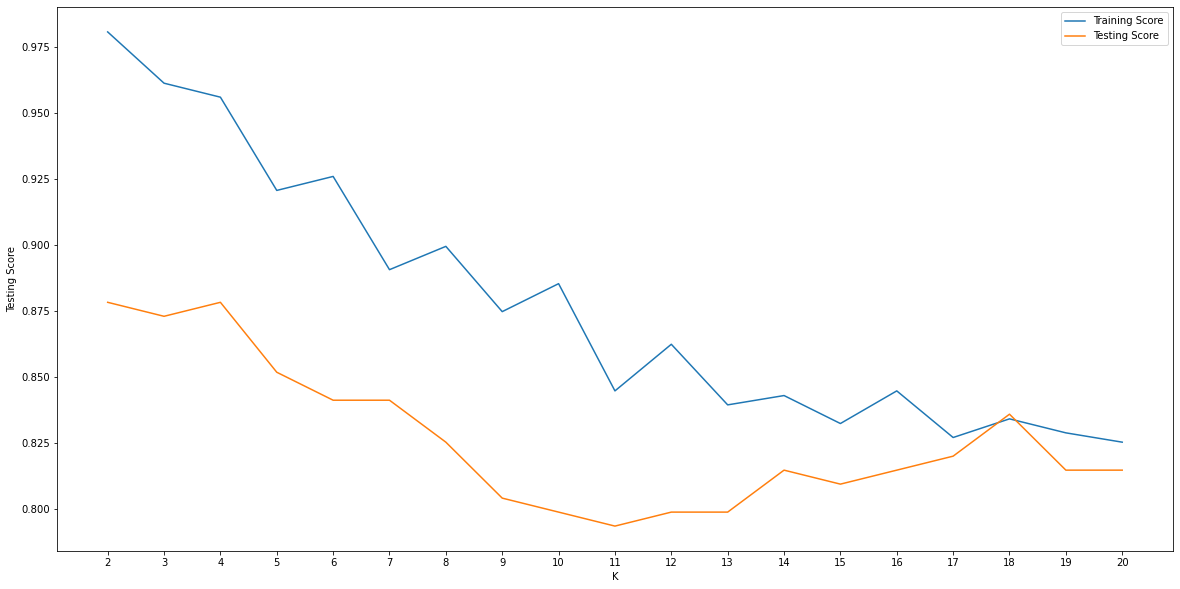

In [188]:
plt.figure(figsize=(20,10))
ax = plt.plot(K, training, label="Training Score")
plt.xlabel("K")
plt.ylabel("Training Score")
plt.xticks(np.arange(2,21))
ax = plt.plot(K, test, label="Testing Score")
plt.xlabel("K")
plt.ylabel("Testing Score")
plt.legend()
plt.xticks(np.arange(2,21))
plt.show()

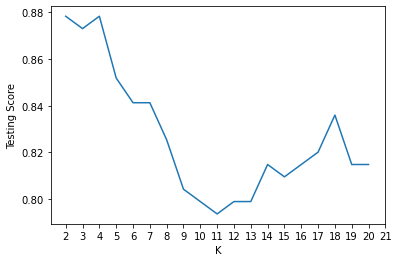

<Figure size 2160x720 with 0 Axes>

In [189]:
ax = plt.plot(K, test);
plt.xlabel("K")
plt.ylabel("Testing Score")
plt.xticks(np.arange(2,22))
plt.figure(figsize=(30,10))
plt.show()

In [190]:
maxacc=0
K=0
for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(x_train, y_train)
    pred=clf.predict(x_test)
    acc=accuracy_score(pred,y_test)
    print("Accuracy: ",acc," K=",k)
    if(acc>maxacc):
        maxacc=acc
        K=k


Accuracy:  0.8783068783068783  K= 2
Accuracy:  0.873015873015873  K= 3
Accuracy:  0.8783068783068783  K= 4
Accuracy:  0.8518518518518519  K= 5
Accuracy:  0.8412698412698413  K= 6
Accuracy:  0.8412698412698413  K= 7
Accuracy:  0.8253968253968254  K= 8
Accuracy:  0.8042328042328042  K= 9
Accuracy:  0.798941798941799  K= 10
Accuracy:  0.7936507936507936  K= 11
Accuracy:  0.798941798941799  K= 12
Accuracy:  0.798941798941799  K= 13
Accuracy:  0.8148148148148148  K= 14
Accuracy:  0.8095238095238095  K= 15
Accuracy:  0.8148148148148148  K= 16
Accuracy:  0.8201058201058201  K= 17
Accuracy:  0.8359788359788359  K= 18
Accuracy:  0.8148148148148148  K= 19
Accuracy:  0.8148148148148148  K= 20


In [191]:
print("Max accuracy: ",maxacc," at K=",K)

Max accuracy:  0.8783068783068783  at K= 2


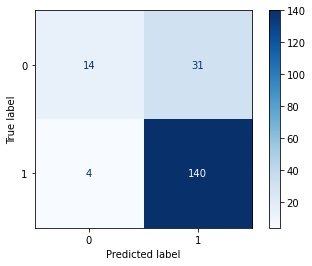

In [192]:
plot_confusion_matrix(clf,x_test, y_test, cmap="Blues")  
plt.show()

# Decision Tree

In [273]:
x_data=df.iloc[:,0:-1].values
y_data=df.iloc[:,-1].values
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25)
df.shape

(756, 755)

In [274]:
sc = StandardScaler()  
# s.fit(X_train)
 
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)
x_test.shape

(189, 754)

In [275]:
#pcaDT = PCA(n_components=150)

#x_train = pcaDT.fit_transform(x_train)
#x_test = pcaDT.fit_transform(x_test)

In [276]:
from sklearn.tree import DecisionTreeClassifier

clfDT = DecisionTreeClassifier(random_state=3)
 
clfDT.fit(x_train, y_train)

DecisionTreeClassifier(random_state=3)

In [277]:
pred = clfDT.predict(x_test) 
print("Accuracy is",accuracy_score(y_test,pred))

Accuracy is 0.8518518518518519


(567, 150)

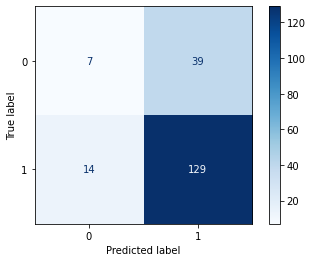

In [44]:
plot_confusion_matrix(clfDT,x_test, y_test, cmap="Blues")  
plt.show()